In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

In [2]:
# Load your dataset
df = pd.read_csv("merged_weather_pm25.csv")

# Drop non-numeric / unhelpful columns
df = df.drop(columns=["name",'date'])
df.dropna(inplace=True)

X=df.iloc[:,  :-1]
y=df.iloc[:, -1]

In [3]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,pm25
0,76.2,60.6,67.1,76.2,60.6,67.1,60.7,80.7,0.0,0,...,304.2,1015.6,14.3,1.2,157.8,13.6,7,10,0.67,249
1,71.7,58.9,63.6,71.7,58.9,63.6,57.9,82.2,0.0,0,...,312.7,1015.9,18.5,1.2,147.6,12.7,6,10,0.70,256
2,73.4,59.0,63.8,73.4,59.0,63.8,57.9,81.8,0.0,0,...,353.6,1015.8,39.2,1.3,169.6,14.7,7,10,0.73,225
3,75.4,57.2,65.1,75.4,57.2,65.1,59.2,82.1,0.0,0,...,79.3,1015.4,29.4,1.0,167.6,14.6,7,10,0.75,268
4,71.2,57.2,63.6,71.2,57.2,63.6,59.7,87.6,0.0,0,...,97.9,1016.2,39.8,0.9,181.6,15.5,7,10,0.80,226


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [6]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [7]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"🌟 XGBoost MAE: {mae:.2f}")
print(f"🌟 XGBoost MSE: {mse:.2f}")

🌟 XGBoost MAE: 20.09
🌟 XGBoost MSE: 704.81


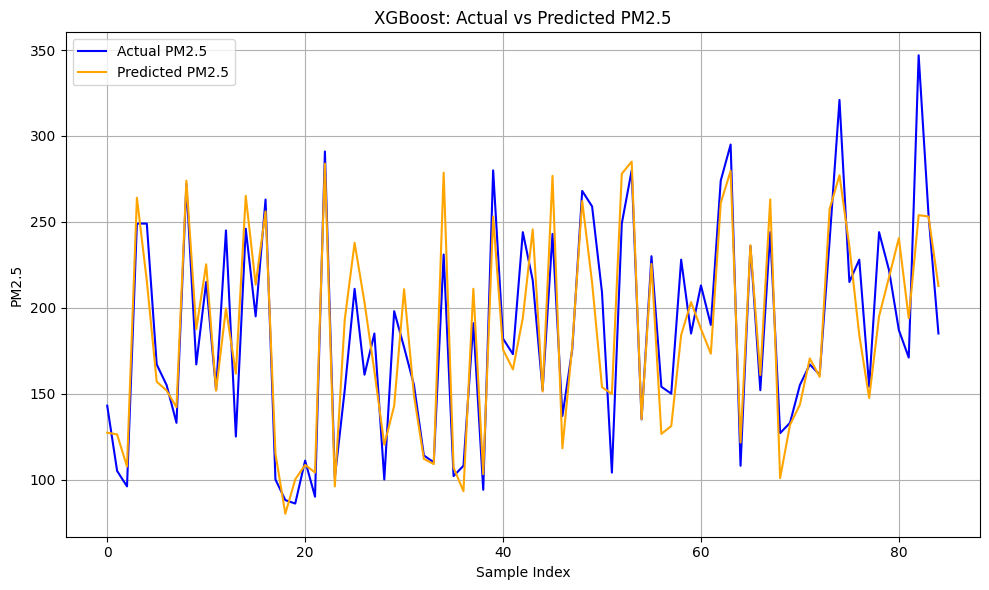

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual PM2.5', color='blue')
plt.plot(y_pred, label='Predicted PM2.5', color='orange')
plt.title("XGBoost: Actual vs Predicted PM2.5")
plt.xlabel("Sample Index")
plt.ylabel("PM2.5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
